In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### Read data
data = pd.read_excel("C:\\Users\\Himanshu\\Downloads\\Case study excel file.xls")

###Exclude records with negative age values
data = data[data['Age']>0]
data['category'] = data['category'].str.lower()

In [3]:
### View first five records
data.head()

,Ref,Credit_Score,Final_Grade,Term,Net_Advance,APR,Loan_Type,Mosaic,Mosaic_Class,Time_at_Address,...,CIFAS_detected,Time_since_most_recent_outstandi,Insurance_Description,PPI,code,prdt_desc,category,PPI_SINGLE,PPI_JOINT,PPI_LCI
0,1,918,A,36,3000.0,14.4,UnSecured,46,8,132,...,N,16,NaN,0,NaN,NaN,NaN,0,0,0
1,3,903,A,120,21000.0,7.9,secured,16,3,288,...,N,99,Life & Critical Illn,1,748.0,LIFE & CRITICAL ILLNESS,lci,0,0,1
2,4,1060,X,78,7200.0,7.9,secured,17,3,276,...,N,50,Joint,1,719.0,LASCI JOINT,joint,0,1,0
3,6,839,B,60,8000.0,16.9,UnSecured,47,8,48,...,N,99,Life & Critical Illn,1,748.0,LIFE & CRITICAL ILLNESS,lci,0,0,1
4,7,1057,X,60,7650.0,7.4,UnSecured,55,10,156,...,N,99,Single,1,718.0,LASCI,single,1,0,0


In [4]:
print("Dataset have ",data.shape[0],"rows and", data.shape[1], "columns")

Dataset have  16380 rows and 59 columns


In [5]:
### Check null values
data.isnull().sum()

Ref                                    0
Credit_Score                           0
Final_Grade                            0
Term                                   0
Net_Advance                            0
APR                                    0
Loan_Type                              0
Mosaic                                 0
Mosaic_Class                           0
Time_at_Address                        0
Residential_Status                     0
Telephone_Indicator                    0
Number_of_Dependants                   0
Marital_Status                         0
Gender                                 0
Time_in_Employment                     0
Employment_Status                      0
Full_Part_Time_Empl_Ind                0
Perm_Temp_Empl_Ind                     0
Income_Range                           0
Current_Account                        0
ACCESS_Card                            0
VISA_Card                              0
American_Express                       0
Diners_Card     

In [6]:
###Customer with PPI

data_ppi = data[data['PPI']==1]
data_ppi.head()

,Ref,Credit_Score,Final_Grade,Term,Net_Advance,APR,Loan_Type,Mosaic,Mosaic_Class,Time_at_Address,...,CIFAS_detected,Time_since_most_recent_outstandi,Insurance_Description,PPI,code,prdt_desc,category,PPI_SINGLE,PPI_JOINT,PPI_LCI
1,3,903,A,120,21000.0,7.9,secured,16,3,288,...,N,99,Life & Critical Illn,1,748.0,LIFE & CRITICAL ILLNESS,lci,0,0,1
2,4,1060,X,78,7200.0,7.9,secured,17,3,276,...,N,50,Joint,1,719.0,LASCI JOINT,joint,0,1,0
3,6,839,B,60,8000.0,16.9,UnSecured,47,8,48,...,N,99,Life & Critical Illn,1,748.0,LIFE & CRITICAL ILLNESS,lci,0,0,1
4,7,1057,X,60,7650.0,7.4,UnSecured,55,10,156,...,N,99,Single,1,718.0,LASCI,single,1,0,0
5,8,913,A,120,33000.0,9.4,secured,59,11,18,...,N,99,Single,1,715.0,LASU,single,1,0,0


# Exploratory data Analysis

Demographics EDA

In [7]:
data['Gender'].value_counts()

M    9768
F    6612
Name: Gender, dtype: int64

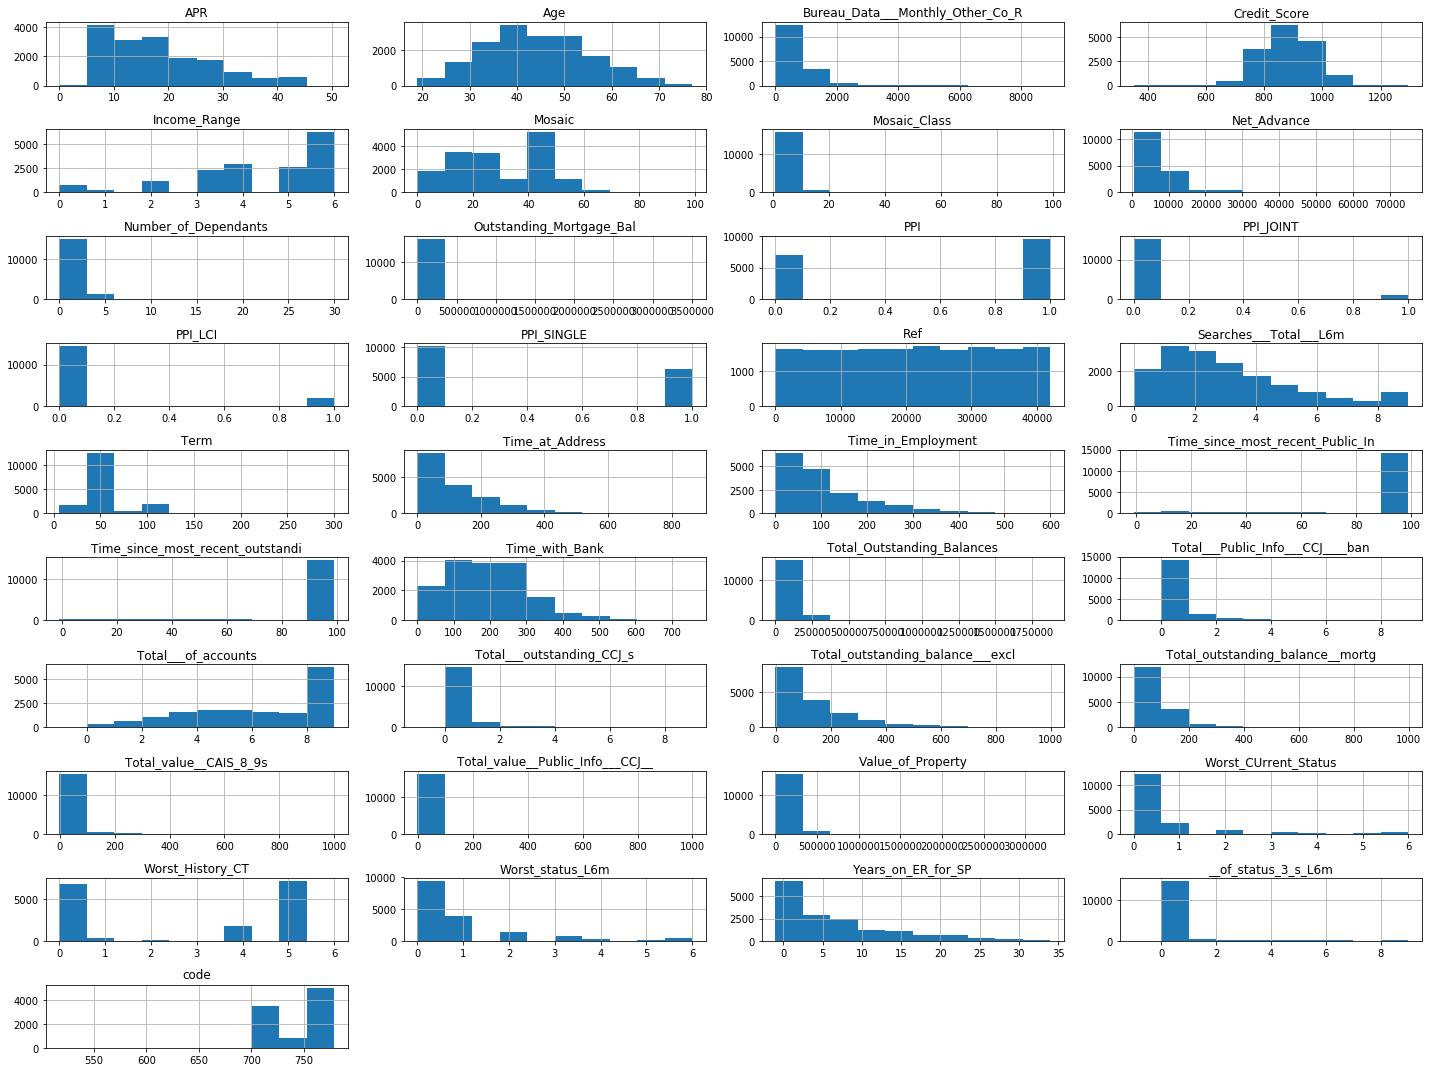

In [8]:
### Lot of numerical variables are skewed

data.hist(figsize=(20,15),layout=(10,4))
plt.tight_layout()
plt.show()

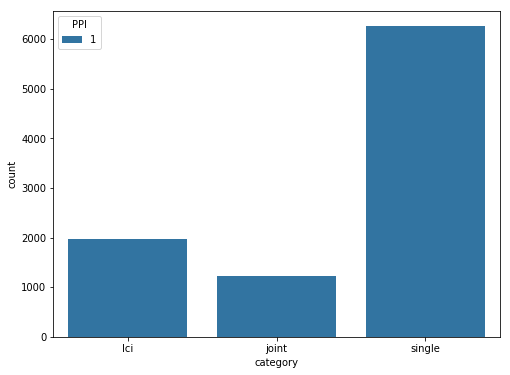

In [9]:
###Count of each PPI category
plt.figure(figsize = (8,6))
sns.countplot(data = data[data['PPI']==1], x = 'category', hue = 'PPI')
plt.show()

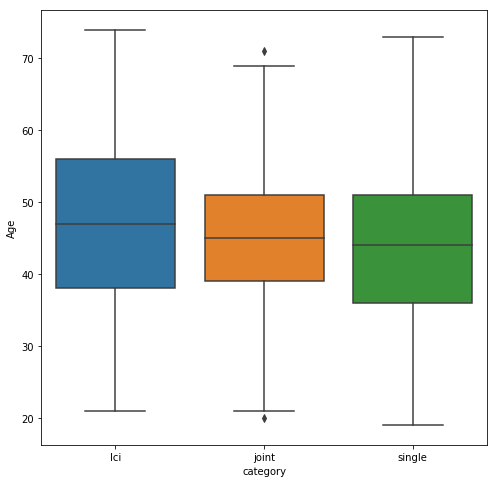

In [10]:
###Box plot of Age for each PPI category
plt.figure(figsize = (8,8))
sns.boxplot(data = data, y = 'Age', x = 'category')
plt.show()

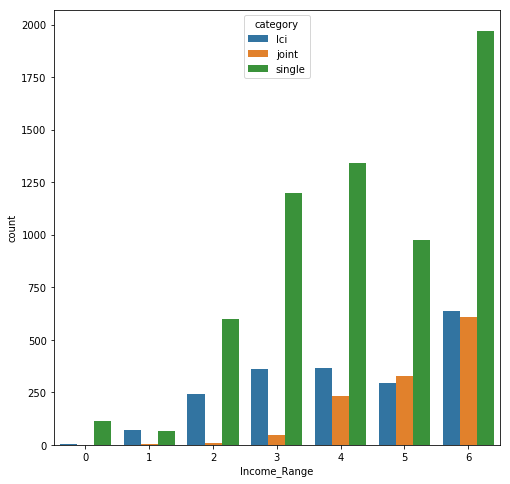

In [11]:
###Income range for each PPI category
plt.figure(figsize = (8,8))
sns.countplot(data = data, x = 'Income_Range', hue = 'category')
plt.show()

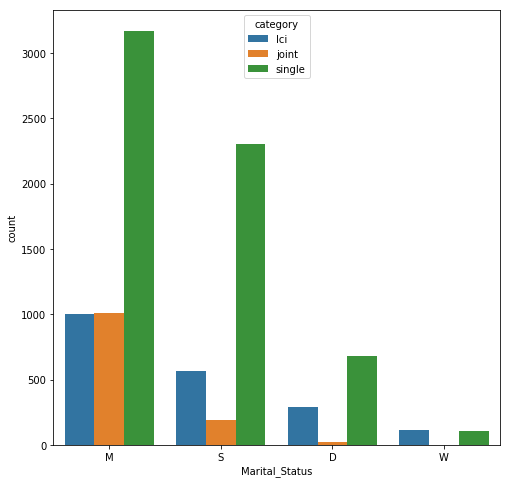

In [12]:
plt.figure(figsize = (8,8))
sns.countplot(data = data, x = 'Marital_Status',hue = 'category')
plt.show()

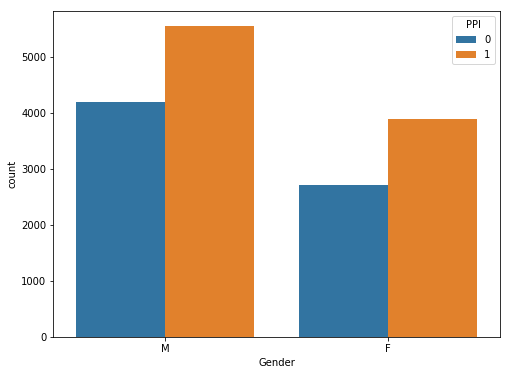

In [13]:
###Male are prospect for PPI but they are higher in number in the data
plt.figure(figsize = (8,6))
ax = sns.countplot(data = data, x = 'Gender', hue = 'PPI')
plt.show()

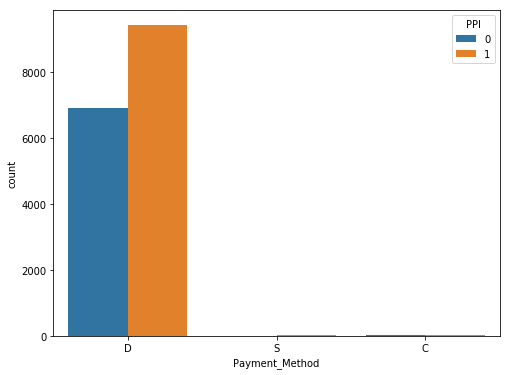

In [14]:
###Payment methof = 'D' have more PPI customer but majority of the daya have 'D' payment type
plt.figure(figsize = (8,6))
ax = sns.countplot(data = data, x = 'Payment_Method', hue = 'PPI')
plt.show()

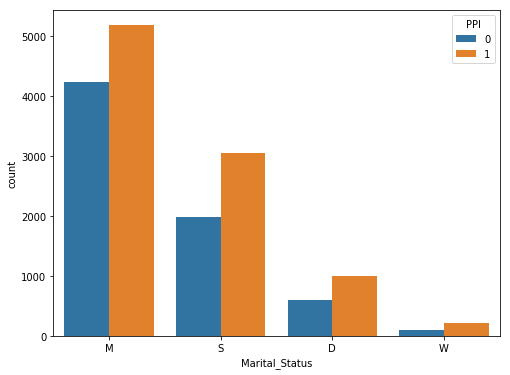

In [15]:
plt.figure(figsize = (8,6))
ax = sns.countplot(data = data, x = 'Marital_Status', hue = 'PPI')
plt.show()


In [16]:
###Data have more married people followed by singles
data['Marital_Status'].value_counts()

M    9430
S    5037
D    1598
W     315
Name: Marital_Status, dtype: int64

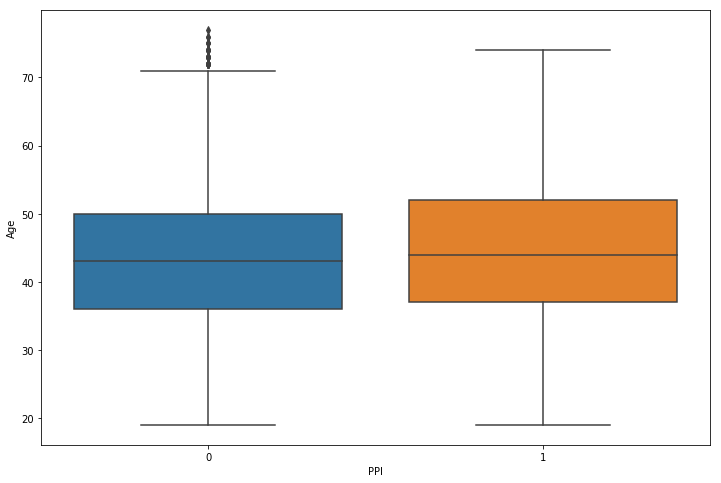

In [17]:
###Not significant difference of Age wrt PPI customer. However PPI customer have higher median age
plt.figure(figsize = (12,8))
sns.boxplot(data = data, y = 'Age',x = 'PPI')
plt.show()

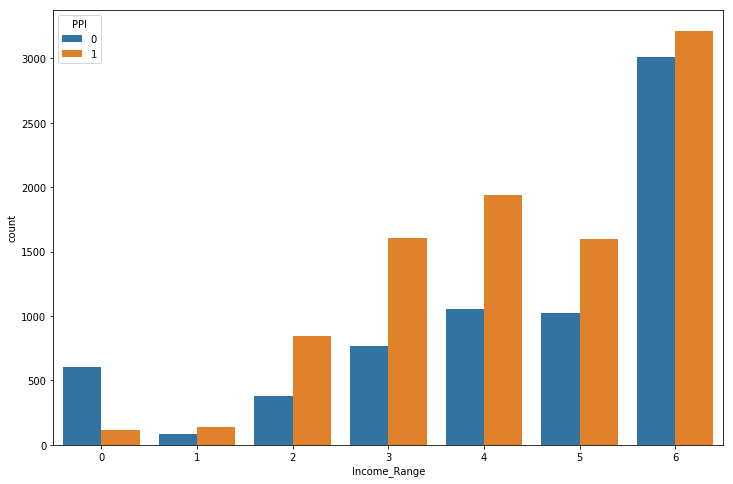

In [18]:
###Higher income range have more PPI customers
plt.figure(figsize = (12,8))
sns.countplot(data = data, x = 'Income_Range',hue = 'PPI')
plt.show()

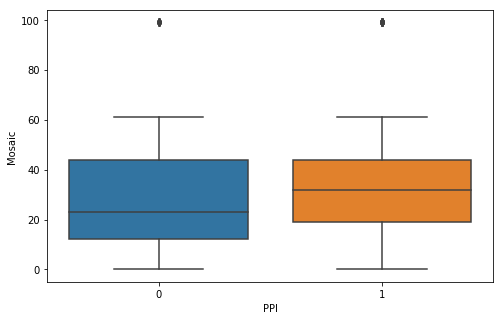

In [19]:
### Customer with higher mosaic value have more chance to buy PPI 
plt.figure(figsize = (8,5))
sns.boxplot(data = data, y = 'Mosaic',x = 'PPI')
plt.show()

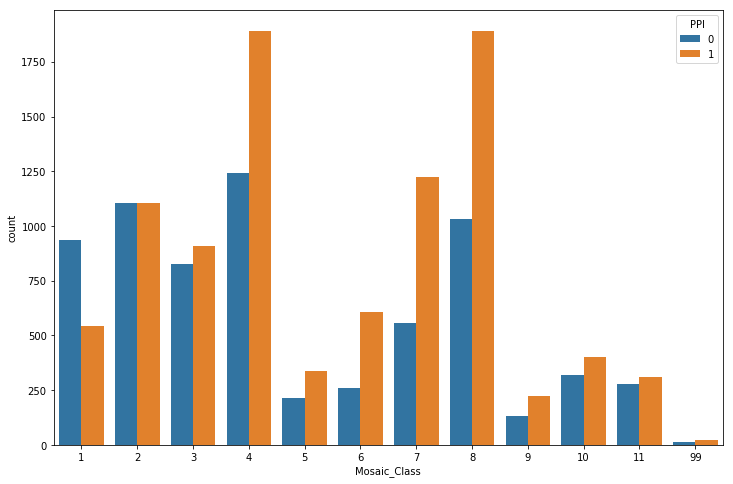

In [20]:
###Customer with mosaic value 3-8 are prospect of PPI
plt.figure(figsize = (12,8))
sns.countplot(data = data, x = 'Mosaic_Class',hue = 'PPI')
plt.show()

C:\Users\Himanshu\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


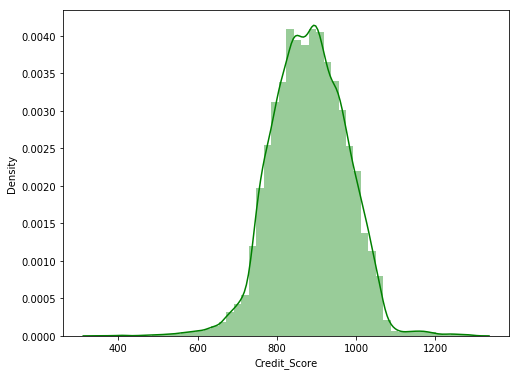

In [21]:
### Credit Score of most of the PPI customers is between 800-1000
plt.figure(figsize=(8,6))
sns.distplot(data[['Credit_Score']['PPI'==1]], color="green")
plt.show()

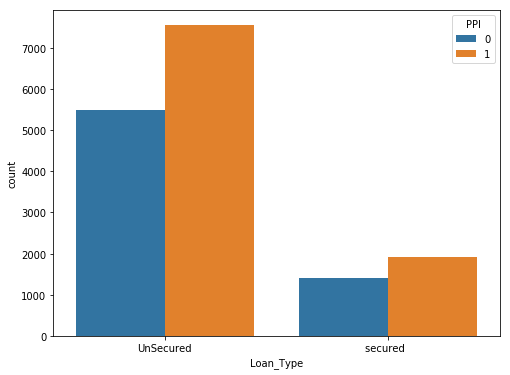

In [22]:
###Most of the loan disbursed is unsecured type and have higher PPI customer for unsecured loan
plt.figure(figsize = (8,6))
sns.countplot(data = data, x = 'Loan_Type',hue = 'PPI')
plt.show()

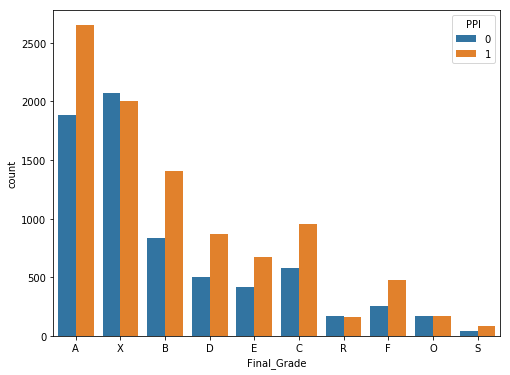

In [23]:
##Final Grade A and X have more PPI customers
plt.figure(figsize = (8,6))
sns.countplot(data = data, x = 'Final_Grade',hue = 'PPI')
plt.show()

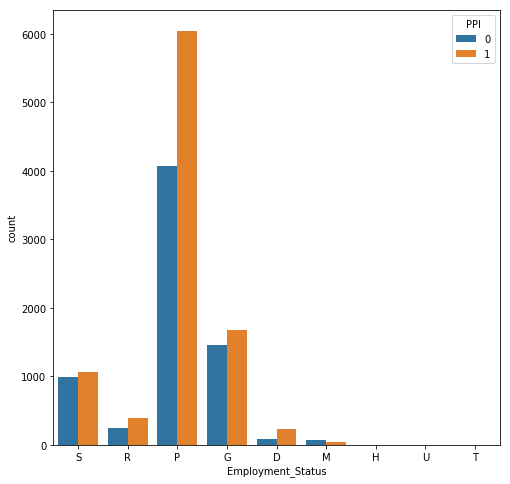

In [24]:
##Employment status "P" have higher PPI customer
plt.figure(figsize = (8,8))
sns.countplot(data = data, x = 'Employment_Status', hue = 'PPI')
plt.show()

C:\Users\Himanshu\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


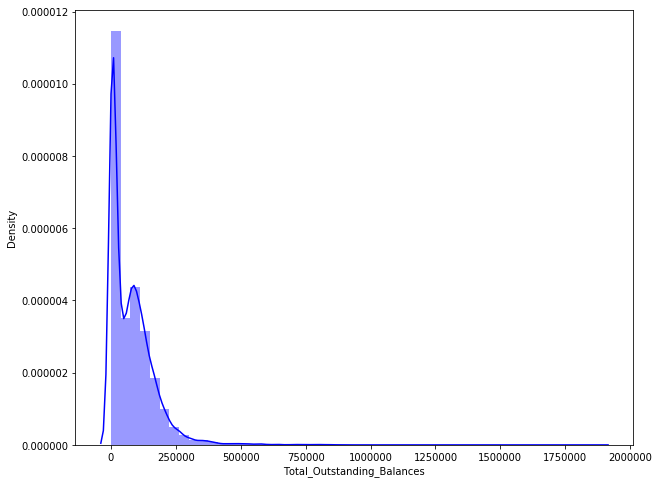

In [25]:
###Total Outstanding Balance distribution for PPI customers
plt.figure(figsize=(10,8))
sns.distplot(data[['Total_Outstanding_Balances']['PPI'=='1']], color="blue")
plt.show()

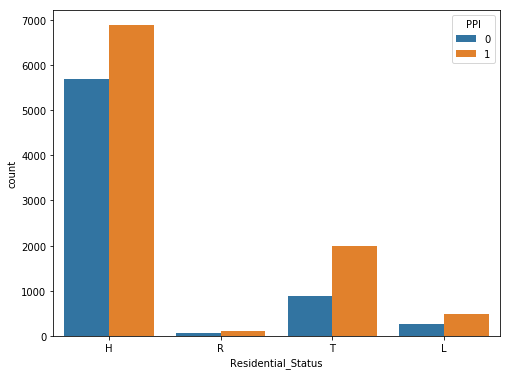

In [26]:
###House owners buys PPI more followed by tenants
plt.figure(figsize = (8,6))
sns.countplot(data = data, x = 'Residential_Status',hue = 'PPI')
plt.show()

C:\Users\Himanshu\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


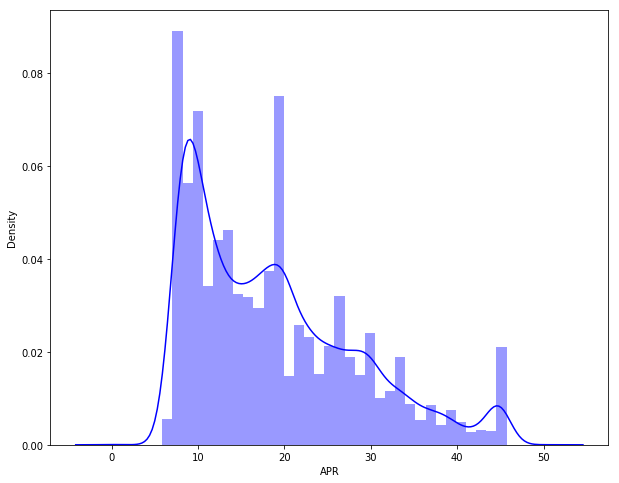

In [27]:
###APR distribution
plt.figure(figsize=(10,8))
sns.distplot(data[['APR']['PPI'=='1']], color="blue")
plt.show()

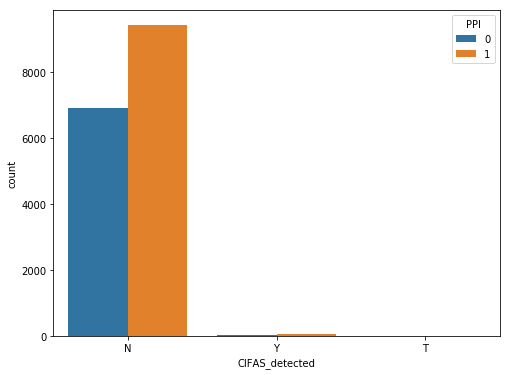

In [28]:
# We dig into fraud cases with CIFAS detected. Only target customers having "N" value for CIFAS 
#Link - https://www.cifas.org.uk/

plt.figure(figsize = (8,6))
sns.countplot(data = data, x = 'CIFAS_detected', hue = 'PPI')
plt.show()

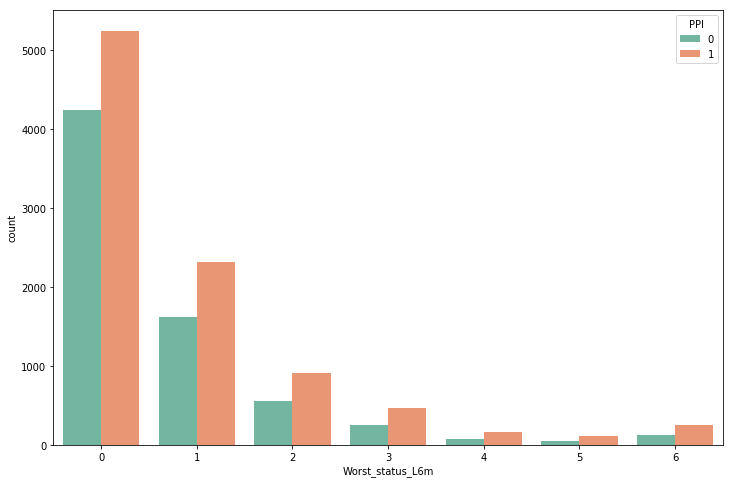

In [29]:
##Worst status  = 0 and 1 have more PPI customers
plt.figure(figsize = (12,8))
sns.countplot(data = data, x = 'Worst_status_L6m', hue = 'PPI',palette = "Set2")
plt.show()

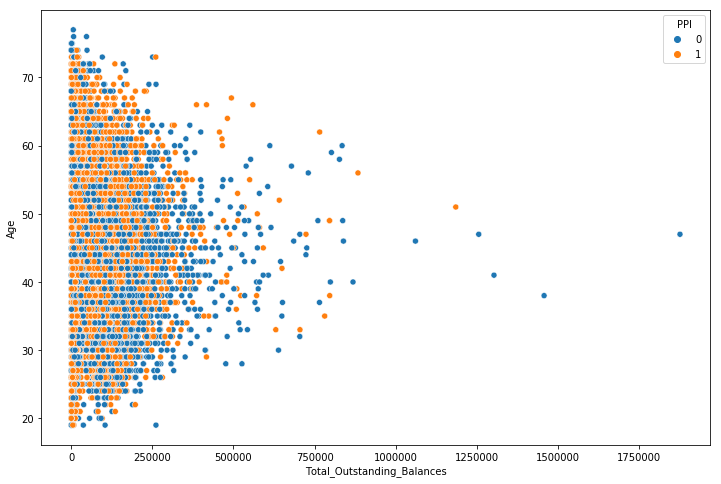

In [30]:
### Outstanding Balance is not significantly different for PPI and non-PPI customers
plt.figure(figsize = (12,8))
sns.scatterplot(data=data, x="Total_Outstanding_Balances", y="Age",hue='PPI')
plt.show()